
# TP Global : Pipeline de Données et Analyse Exploratoire  
## Dataset : Netflix Movies and TV Shows (Kaggle)  
### Notebook Chapitres 2 et 3

Ce notebook présente **une solution possible** au TP sur le dataset Netflix.
Les réponses ne sont pas uniques, mais illustrent une démarche correcte.



## 1. Collecte — Correction

- **Source** : site d'open data Kaggle, dataset *Netflix Movies and TV Shows*.
- **Type** : fichier CSV statique (`netflix_titles.csv`).
- **Contenu** : chaque ligne représente un titre (film ou série) présent sur Netflix.
- **Taille typique** : environ 8 000–9 000 lignes et 12 colonnes.


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

sns.set()

df = pd.read_csv('netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...



## 2. Ingestion — Correction

On vérifie les types de colonnes et on identifie celles à convertir.


In [3]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


**Analyse des types :**

- `date_added` est de type `object` (texte) → à convertir en `datetime`.
- `duration` est de type `object` (ex: `"90 min"` ou `"2 Seasons"`) → à transformer en valeur numérique séparée pour les films.
- Les autres colonnes texte (`title`, `director`, `cast`, `country`, `rating`, `listed_in`, `description`) peuvent rester en `object` pour l'instant.



## 3. Validation de la qualité — Correction

On inspecte la structure, les valeurs manquantes et les doublons.


In [4]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:

df.isna().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:

df.duplicated().sum()


np.int64(0)


**Principaux problèmes observés :**

- Des valeurs manquantes dans `director`, `cast`, `country`, `date_added`, `rating`.
- `date_added` n'est pas au bon format (texte, non date).
- `duration` mélange des minutes et des saisons dans une même colonne.
- Quelques lignes sont potentiellement dupliquées (on vérifie et on supprime les doublons exacts).



## 4. Nettoyage du dataset — Correction


In [7]:

# Suppression des doublons exacts
df = df.drop_duplicates()

# Conversion de la date d'ajout
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Nettoyage basique des colonnes texte (strip)
text_cols = ['title', 'director', 'cast', 'country', 'rating', 'listed_in']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB



**Exemples de corrections et justification :**

1. **Suppression des doublons** : évite de compter deux fois le même titre, ce qui fausserait les statistiques.
2. **Conversion de `date_added` en datetime** : permet de faire des analyses temporelles (par année, par mois…).
3. **Nettoyage des colonnes texte (strip)** : évite des variations artificielles dues aux espaces (`"Drama"` vs `"Drama "`).



## 5. Détection des valeurs aberrantes (outliers) — Correction

On se concentre sur les **films** et on crée une colonne numérique `duration_min`.


In [8]:

movies = df[df['type'] == 'Movie'].copy()

# On retire la chaîne ' min' et on convertit en float
movies['duration_min'] = (
    movies['duration']
    .str.replace(' min', '', regex=False)
    .astype(float)
)

movies[['title', 'duration', 'duration_min']].head()


,title,duration,duration_min
0,Dick Johnson Is Dead,90 min,90.0
6,My Little Pony: A New Generation,91 min,91.0
7,Sankofa,125 min,125.0
9,The Starling,104 min,104.0
12,Je Suis Karl,127 min,127.0


In [9]:

# Méthode IQR
Q1 = movies['duration_min'].quantile(0.25)
Q3 = movies['duration_min'].quantile(0.75)
IQR = Q3 - Q1

low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR

outliers_iqr = movies[(movies['duration_min'] < low) | (movies['duration_min'] > high)]
outliers_iqr.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_min
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",nan,2021-09-21,1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...,161.0
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,166.0
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,nan,nan,2021-09-16,2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,23.0
71,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",nan,2021-09-14,2021,TV-Y,13 min,Children & Family Movies,Join the StoryBots and the space travelers of ...,13.0
73,s74,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,2021-09-14,2018,TV-MA,182 min,"Dramas, International Movies",When a powerful businesswoman’s political ambi...,182.0


In [10]:

# Méthode Z-score
movies['z_duration'] = zscore(movies['duration_min'])

outliers_z = movies[movies['z_duration'].abs() > 3]
outliers_z.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_min,z_duration



**Commentaire :**

- La méthode IQR considère comme outliers les valeurs très éloignées des quartiles, sans hypothèse sur la forme de la distribution.
- La méthode Z-score suppose plutôt une distribution proche de la normale.  
En général, on obtient une liste d’outliers légèrement différente avec les deux méthodes.



## 6. Normalisation et standardisation — Correction


In [11]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
standardizer = StandardScaler()

movies['duration_min_norm'] = scaler.fit_transform(movies[['duration_min']])
movies['duration_min_std'] = standardizer.fit_transform(movies[['duration_min']])

movies[['duration_min', 'duration_min_norm', 'duration_min_std']].head()


,duration_min,duration_min_norm,duration_min_std
0,90.0,0.281553,-0.338557
6,91.0,0.284790,-0.303206
7,125.0,0.394822,0.898705
9,104.0,0.326861,0.156348
12,127.0,0.401294,0.969405



**Pourquoi normaliser / standardiser ?**

- Certains algorithmes de Machine Learning (k-means, k-NN, régression logistique…) sont sensibles à l'échelle des variables.
- Si une variable a des valeurs beaucoup plus grandes qu'une autre, elle dominera la distance ou la fonction de coût.
- Normaliser ou standardiser met toutes les variables sur une échelle comparable et améliore la convergence et la performance.



## 7. Transformations — Correction

On crée une colonne `year_added` et on calcule le nombre de titres ajoutés par année.


In [12]:

df['year_added'] = df['date_added'].dt.year

titles_per_year = df['year_added'].value_counts().sort_index()
titles_per_year.head()


year_added
2008.0     2
2009.0     2
2010.0     1
2011.0    13
2012.0     3
Name: count, dtype: int64


**Exemple d'agrégation utile :**  
> Nombre de titres ajoutés sur Netflix par année (`year_added`), ou bien nombre de titres par année de sortie (`release_year`).



## 8. Stockage final — Correction


In [13]:

df.to_csv('netflix_cleaned.csv', index=False)
# df.to_parquet('netflix_cleaned.parquet')  # si pyarrow ou fastparquet est installé



**Pourquoi Parquet est souvent préférable au CSV pour les gros volumes ?**

- Il est **compressé** et **colonnaire**, ce qui réduit la taille sur disque.
- Il est optimisé pour les requêtes analytiques : on peut lire seulement quelques colonnes.
- Les types sont mieux conservés que dans un CSV (où tout est du texte).



# PARTIE B — Analyse exploratoire (EDA) — Correction



## 9. Analyse univariée — Correction

On étudie la distribution de la durée des films et de l'année de sortie.


In [14]:

movies['duration_min'].describe()


count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_min, dtype: float64

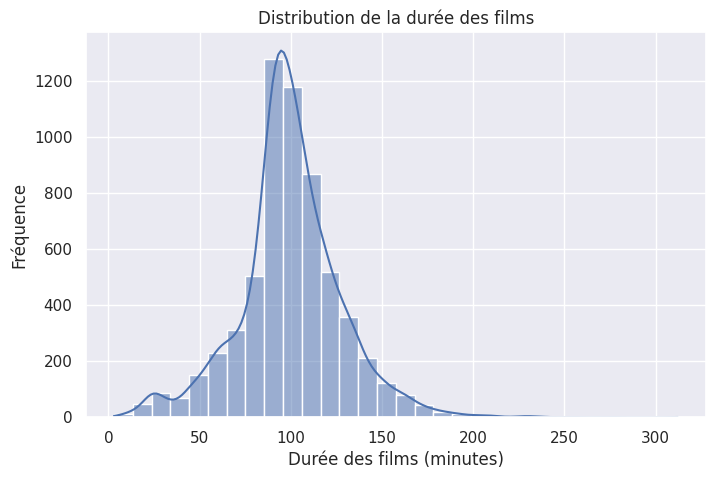

In [15]:

plt.figure(figsize=(8,5))
sns.histplot(movies['duration_min'], bins=30, kde=True)
plt.xlabel("Durée des films (minutes)")
plt.ylabel("Fréquence")
plt.title("Distribution de la durée des films")
plt.show()


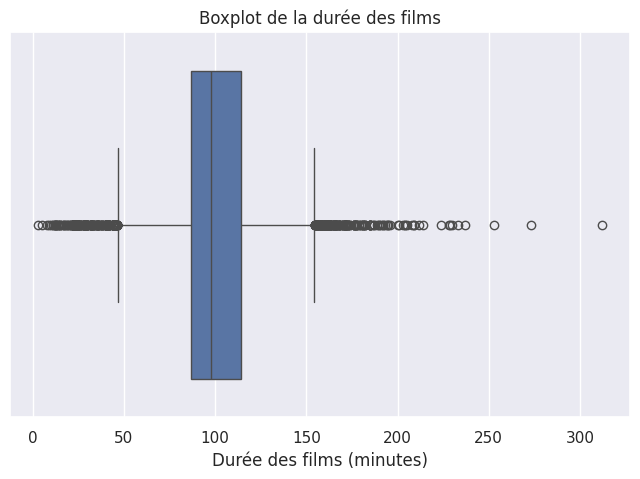

In [16]:

plt.figure(figsize=(8,5))
sns.boxplot(x=movies['duration_min'])
plt.xlabel("Durée des films (minutes)")
plt.title("Boxplot de la durée des films")
plt.show()



**Commentaire :**

- La distribution des durées est souvent asymétrique (légèrement étalée vers les durées longues).
- Le boxplot met en évidence des films très courts ou très longs par rapport au reste (outliers).



## 10. Analyse bivariée — Correction

Exemples de relations étudiées :
- Durée des films selon le rating.
- Répartition des films au cours des années de sortie.


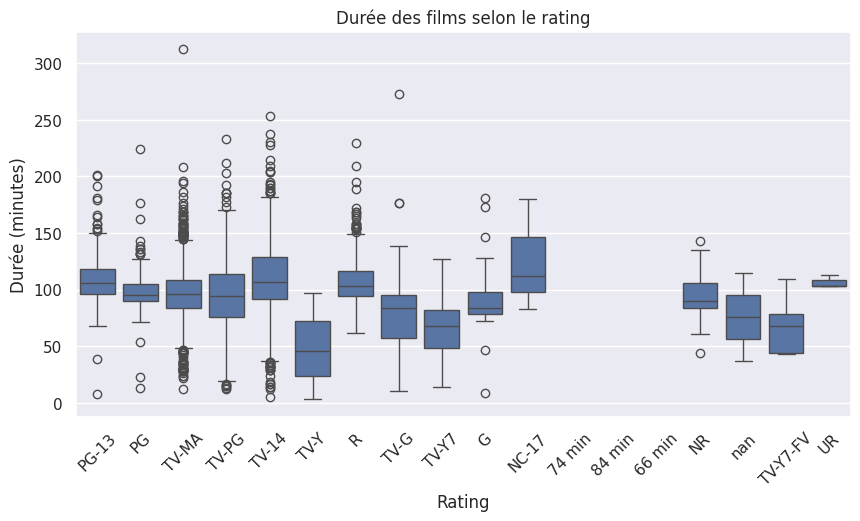

In [17]:

plt.figure(figsize=(10,5))
sns.boxplot(data=movies, x='rating', y='duration_min')
plt.xticks(rotation=45)
plt.xlabel("Rating")
plt.ylabel("Durée (minutes)")
plt.title("Durée des films selon le rating")
plt.show()


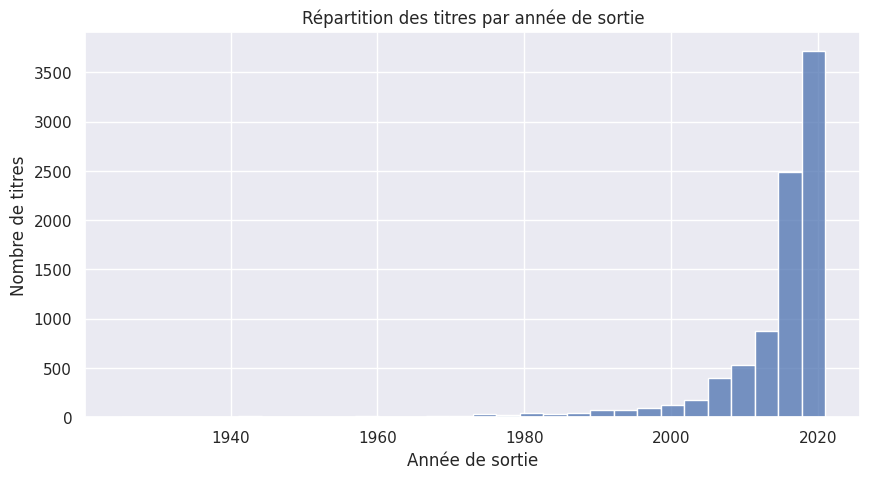

In [18]:

plt.figure(figsize=(10,5))
sns.histplot(df['release_year'], bins=30)
plt.xlabel("Année de sortie")
plt.ylabel("Nombre de titres")
plt.title("Répartition des titres par année de sortie")
plt.show()



On peut également regarder la corrélation entre variables numériques (`release_year`, `year_added`).


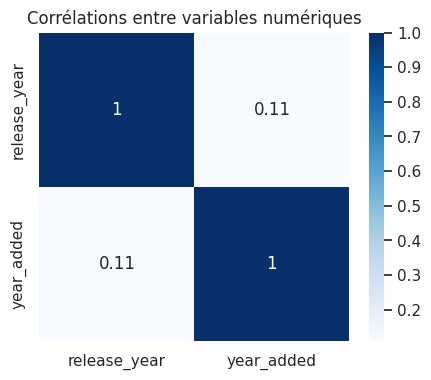

In [19]:

plt.figure(figsize=(5,4))
sns.heatmap(df[['release_year', 'year_added']].corr(), annot=True, cmap="Blues")
plt.title("Corrélations entre variables numériques")
plt.show()



## Visualisations supplémentaires — Correction

Nous reprenons ici les visualisations demandées dans la partie « Visualisations supplémentaires » du TP.


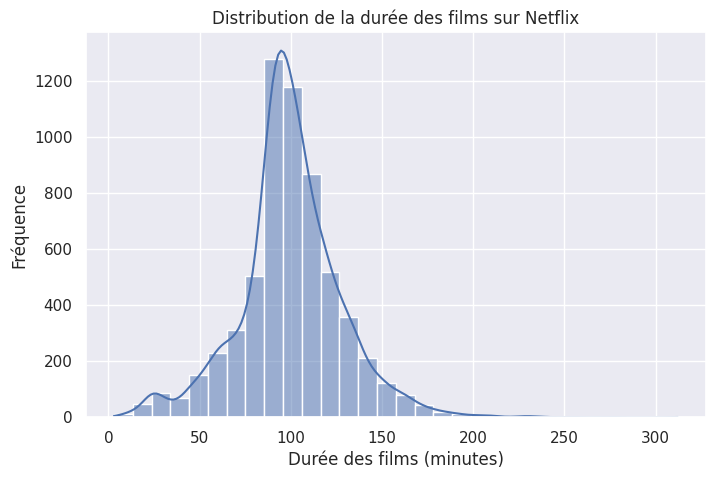

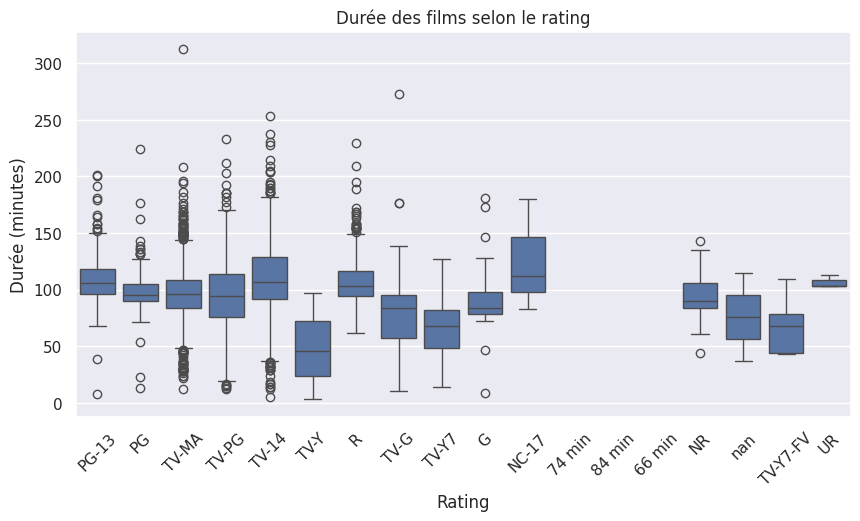

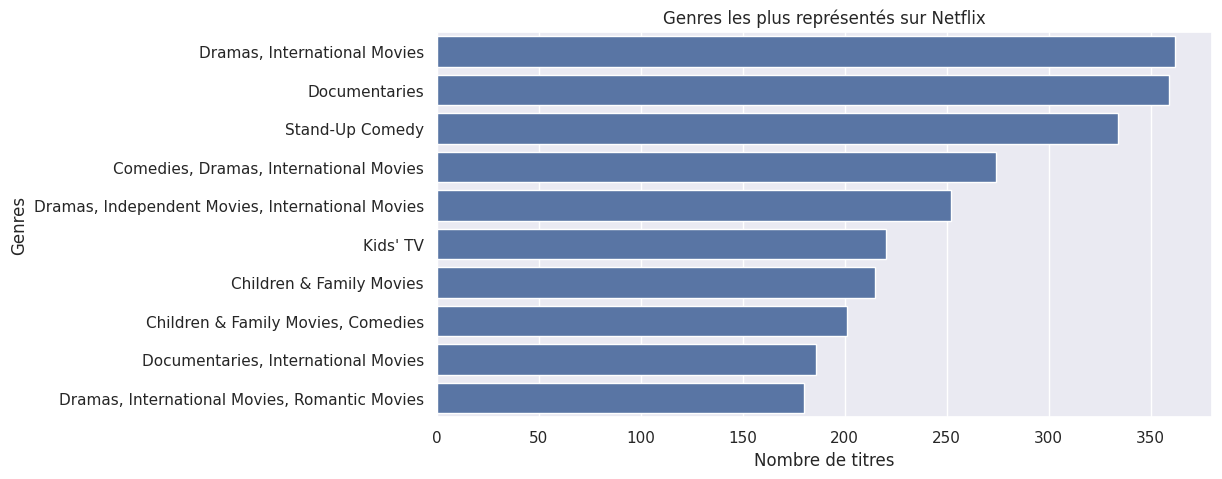

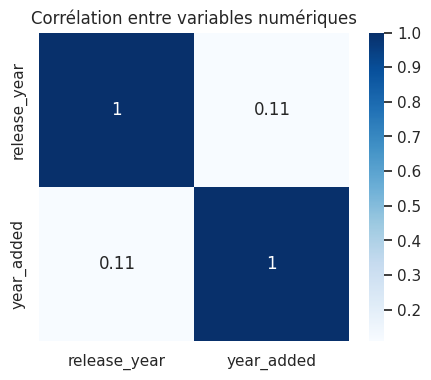

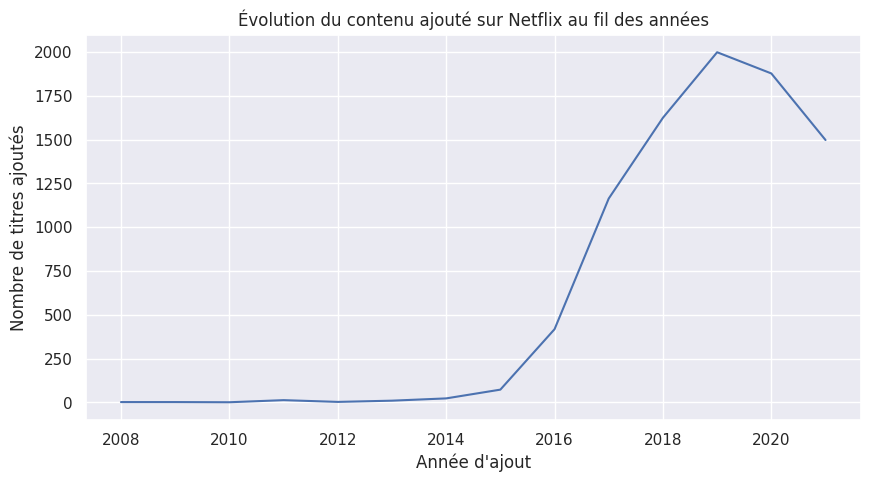

In [20]:

# Histogramme + densité (KDE) sur la durée des films
plt.figure(figsize=(8,5))
sns.histplot(movies['duration_min'], kde=True, bins=30)
plt.xlabel("Durée des films (minutes)")
plt.ylabel("Fréquence")
plt.title("Distribution de la durée des films sur Netflix")
plt.show()

# Boxplot : durée en minutes selon le rating
plt.figure(figsize=(10,5))
sns.boxplot(data=movies, x='rating', y='duration_min')
plt.xticks(rotation=45)
plt.xlabel("Rating")
plt.ylabel("Durée (minutes)")
plt.title("Durée des films selon le rating")
plt.show()

# Barplot des genres les plus fréquents
top_genres = df['listed_in'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.xlabel("Nombre de titres")
plt.ylabel("Genres")
plt.title("Genres les plus représentés sur Netflix")
plt.show()

# Heatmap des corrélations numériques
plt.figure(figsize=(5,4))
sns.heatmap(df[['release_year', 'year_added']].corr(), annot=True, cmap='Blues')
plt.title("Corrélation entre variables numériques")
plt.show()

# Série temporelle : titres ajoutés par année
titles_per_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=titles_per_year.index, y=titles_per_year.values)
plt.xlabel("Année d'ajout")
plt.ylabel("Nombre de titres ajoutés")
plt.title("Évolution du contenu ajouté sur Netflix au fil des années")
plt.show()



## 12. Mini-rapport 



- **Problèmes de qualité détectés :**
  - Valeurs manquantes dans `director`, `cast`, `country`, `date_added`.
  - Format de date incorrect pour `date_added`.
  - Colonne `duration` non numérique.

- **Corrections apportées :**
  - Suppression des doublons.
  - Conversion de `date_added` en `datetime`.
  - Création de `duration_min` numérique pour les films.

- **Insights :**
  - La majorité des films durent entre 80 et 120 minutes.
  - Certains genres (drama, comédie) dominent largement le catalogue.
  - Le nombre de titres ajoutés augmente fortement à partir des années 2015.

- **Transformations justifiées :**
  - Création de `year_added` pour faciliter les analyses temporelles.
  - Normalisation/standardisation de `duration_min` pour usage futur en Machine Learning.
